In [9]:
!pip install pandas numpy matplotlib scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.6.0-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp312-cp312-win_amd64.whl.metadata (168 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -------

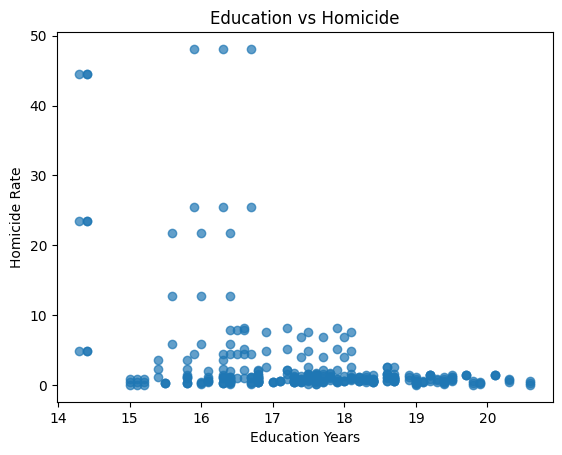

   set  train_error  train_score  cv_avg_score  cv_score_variation  \
0    1     0.869053     0.066777      0.024710            0.055413   
1    2     0.936516     0.071751     -0.138809            0.370682   
2    3     0.952784     0.083134      0.063575            0.020148   

   test_error  test_score  
0    7.148599   -0.021977  
1    5.990414   -0.008611  
2    8.385833   -0.035553  


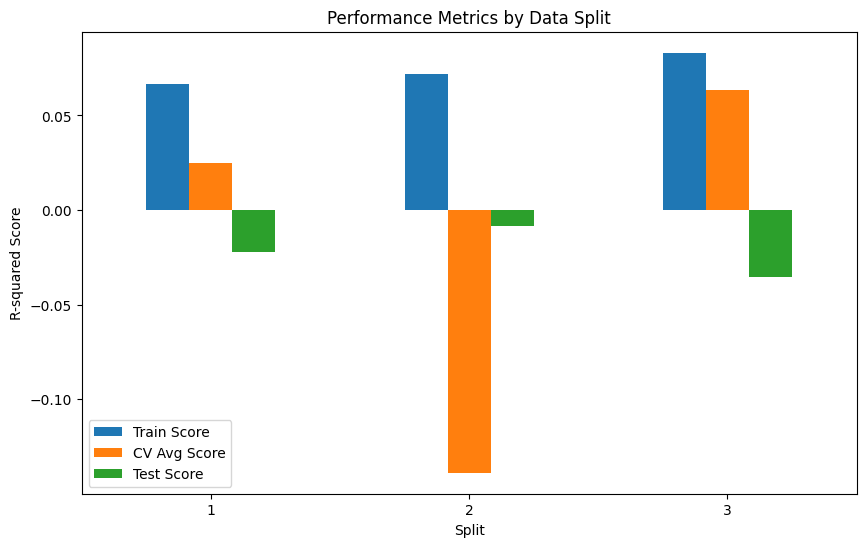

Optimal Data Split: set                   2.000000
train_error           0.936516
train_score           0.071751
cv_avg_score         -0.138809
cv_score_variation    0.370682
test_error            5.990414
test_score           -0.008611
Name: 1, dtype: float64


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

dataframe = pd.read_csv('AI/oecd_bli_2015.csv')
education = dataframe[dataframe['Indicator'] == 'Years in education'][['Country', 'Value']].rename(columns={'Value': 'Education Years'})
homicide = dataframe[dataframe['Indicator'] == 'Homicide rate'][['Country', 'Value']].rename(columns={'Value': 'Homicide Rate'})
merged = pd.merge(education, homicide, on='Country').dropna()
data = merged[['Education Years', 'Homicide Rate']].dropna()

plt.scatter(data['Education Years'], data['Homicide Rate'], alpha=0.7)
plt.xlabel('Education Years')
plt.ylabel('Homicide Rate')
plt.title('Education vs Homicide')
plt.show()

data['Homicide_Category'] = pd.qcut(data['Homicide Rate'], q=4, labels=False)
partitions = []
splitter = StratifiedKFold(n_splits=3, shuffle=True, random_state=10)

for train_idx, test_idx in splitter.split(data, data['Homicide_Category']):
    train_part = data.iloc[train_idx].drop(columns=['Homicide_Category'])
    test_part = data.iloc[test_idx].drop(columns=['Homicide_Category'])
    partitions.append((train_part, test_part))

results = []

for idx, (train_part, test_part) in enumerate(partitions):
    train_part = train_part[(train_part['Homicide Rate'] > train_part['Homicide Rate'].quantile(0.1)) &
                            (train_part['Homicide Rate'] < train_part['Homicide Rate'].quantile(0.9))]

    model = LinearRegression()
    X_train = train_part[['Education Years']]
    y_train = train_part['Homicide Rate']
    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    train_error = np.sqrt(mean_squared_error(y_train, train_preds))
    train_score = r2_score(y_train, train_preds)

    cv_scores = cross_val_score(model, X_train, y_train, cv=4, scoring='r2')

    X_test = test_part[['Education Years']]
    y_test = test_part['Homicide Rate']
    test_preds = model.predict(X_test)
    test_error = np.sqrt(mean_squared_error(y_test, test_preds))
    test_score = r2_score(y_test, test_preds)

    results.append({
        'set': idx + 1,
        'train_error': train_error,
        'train_score': train_score,
        'cv_avg_score': np.mean(cv_scores),
        'cv_score_variation': np.std(cv_scores),
        'test_error': test_error,
        'test_score': test_score
    })

summary = pd.DataFrame(results)
print(summary)

summary.set_index('set')[['train_score', 'cv_avg_score', 'test_score']].plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics by Data Split')
plt.xlabel('Split')
plt.ylabel('R-squared Score')
plt.xticks(rotation=0)
plt.legend(['Train Score', 'CV Avg Score', 'Test Score'])
plt.show()

best_split = summary.loc[summary['test_score'].idxmax()]
print("Optimal Data Split:", best_split)


In [14]:
import pandas as pd

file_path = "AI/oecd_bli_2015.csv"  # Adjust the file path if needed
data = pd.read_csv(file_path)
print(data.columns)

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')
